In [27]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [566]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, noise=60, random_state=13)

In [568]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

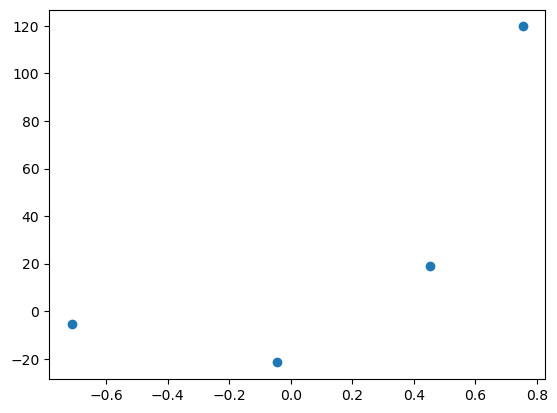

In [570]:
plt.scatter(X, y)

In [572]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [574]:
reg.coef_

array([73.98903908])

In [576]:
reg.intercept_

19.61972463234947

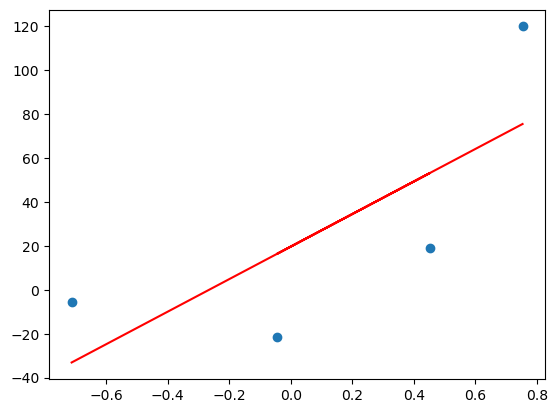

In [578]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r')

Now, let's start applying gradient Descent, assume we know slope, m=73.98903908 and assume we start with a random b value i,e, 0


In [668]:
y_pred = ((73.98903908 * X) + 0).reshape(4)

In [670]:
y_pred

array([-52.70910053,  33.42916079,  -3.29274   ,  55.77045005])

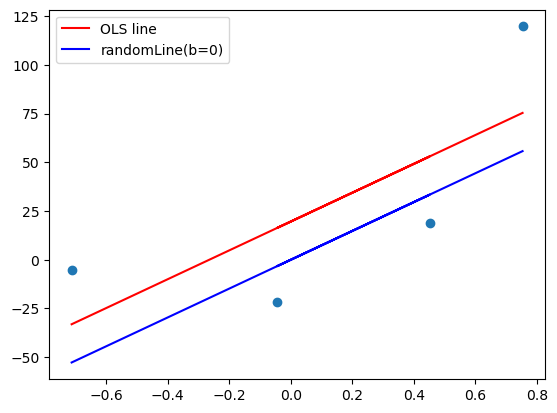

In [642]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS line')
plt.plot(X, y_pred, color='b', label='randomLine(b=0)')
plt.legend()
plt.show()

In [646]:
# Now we have,
import numpy as np
m = 73.98903908
b = 0

loss_slope = -2 * np.sum((y - (m * X.ravel()) - b))

In [648]:
loss_slope

-156.95779705757369

In [650]:
# learning rate
lr = 0.1
stepsize = loss_slope * lr

In [652]:
stepsize

-15.695779705757369

In [654]:
b = b - stepsize
b

15.695779705757369

In [662]:
y_pred1 = (73.98903908 * X + b)

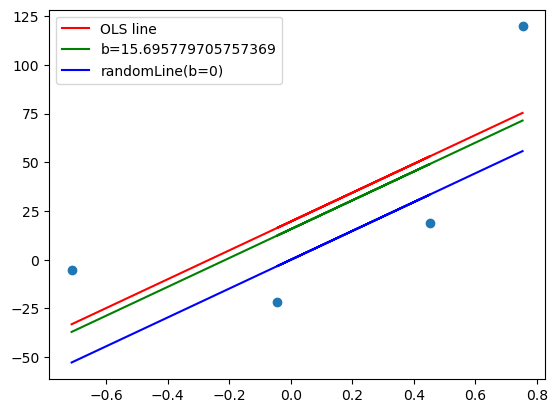

In [672]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS line')
plt.plot(X, y_pred1, color='g', label='b={}'.format(15.695779705757369))
plt.plot(X, y_pred, color='b', label='randomLine(b=0)')
plt.legend()
plt.show()

In [674]:
# iteration 2
loss_slope1 = -2 * np.sum(y - m * X.ravel() - b)

In [676]:
stepsize = loss_slope1 * lr
b = b - stepsize
b

18.83493564690884

b is getting closer to our original intercept value.

In [685]:
# iteration 3
y_pred2 = (73.98903908 * X + b)
loss_slope2 = -2 * np.sum(y - m * X.ravel() - b)
b = b - (loss_slope2 * lr)
b

19.588333072785193

Our original intercept was: 19.61972463234947 and now we reach to 19.588333072785193 i.e, we are very close to reaching our target.


Now let's plot these to visualize better:

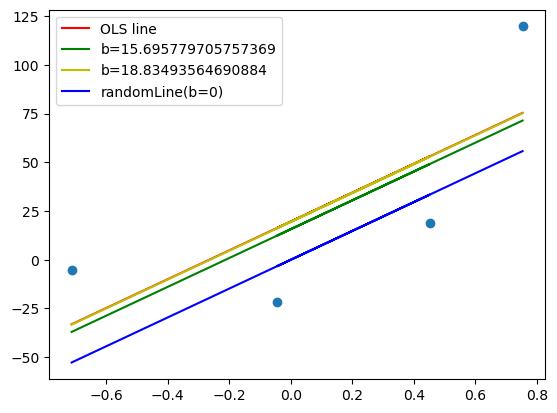

In [694]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='r', label='OLS line')
plt.plot(X, y_pred1, color='g', label='b={}'.format(15.695779705757369))
plt.plot(X, y_pred2, color='y', label='b={}'.format(18.83493564690884))
plt.plot(X, y_pred, color='b', label='randomLine(b=0)')
plt.legend()
plt.show()

The yellow line overlaps the red line meaning, we have reached to our original intercept.

#### Now, let's make this process automated:

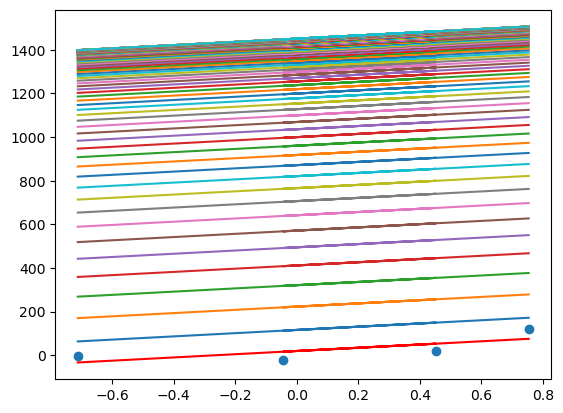

In [720]:
m = 73.98903908
b = 0
lr = 0.01
epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - (m * X.ravel()) - b)
    b = b - (loss_slope * lr)
    y_pred = m * (X + b)
    # print(b)
    # let's also plot the graph
    plt.plot(X, y_pred)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='r')